In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# Get the data
burnout_df = pd.read_csv("https://github.com/aidentariku/Happy-Healthcare-Workers-Coalition/raw/main/Burn-Out-Questionnaire-cleaned-5.csv")
# Clean up the designations
# burnout_df = burnout_df.copy()

# DEMOGRAPHICS

The staff of the hospital is overwhelmingly comprised of female staff and predominantly of the medical sections (Nurse and Doctors)

## Distribution of all Healthcare Workers

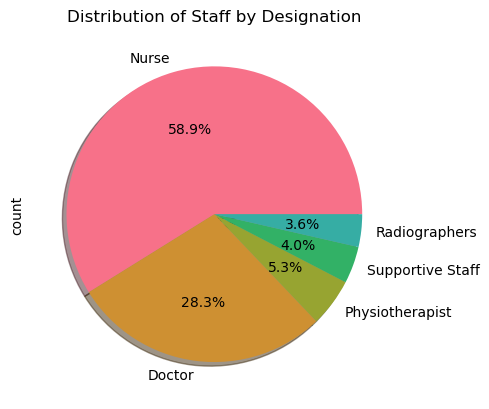

In [3]:
colors = sns.color_palette("husl", 8)
pie_df = burnout_df['Designation'].value_counts()
this_plot = pie_df.plot.pie(title="Distribution of Staff by Designation", legend=False,
                   autopct='%1.1f%%', colors=colors, textprops=dict(color="k"),
                   shadow=True, startangle=0)
plt.show()
del(pie_df)

From this pie-chart, the majority of the healthcare workers are nurses who make up 58.9% of all healthcare workers.

## Distribution of Staff by Gender

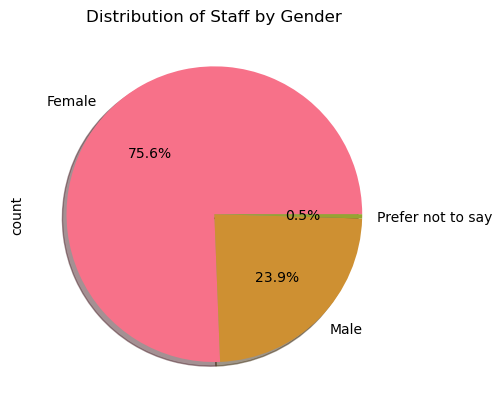

In [4]:
colors = sns.color_palette("husl", 8)
pie_df = burnout_df['Gender'].value_counts()
this_plot = pie_df.plot.pie(title="Distribution of Staff by Gender", legend=False,
                   autopct='%1.1f%%', colors=colors, textprops=dict(color="k"),
                   shadow=True, startangle=0)
plt.show()
del(pie_df)

The analysis shows that the healthcare workers are overwhelmingly female who comprise more that 75% of healthcare workers.

## Distrubution of Staff by Years of Service

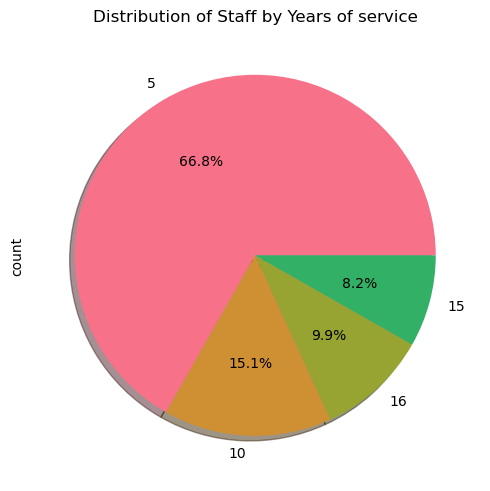

In [5]:
fig, ax = plt.subplots(layout='constrained')
colors = sns.color_palette("husl", 8)
pie_df = burnout_df['Years of service?'].value_counts()
this_plot = pie_df.plot.pie(title="Distribution of Staff by Years of service", legend=False,
                   autopct='%1.1f%%', colors=colors, textprops=dict(color="k"),
                   shadow=True, startangle=0)
# ax.plot(this_plot)
plt.show()
del(pie_df)

The piechart shows that the majority of workers have worked for less than 5 years. The number of workers reduces as the years of service increase.

## Burnout of Healthcare Workers by Gender

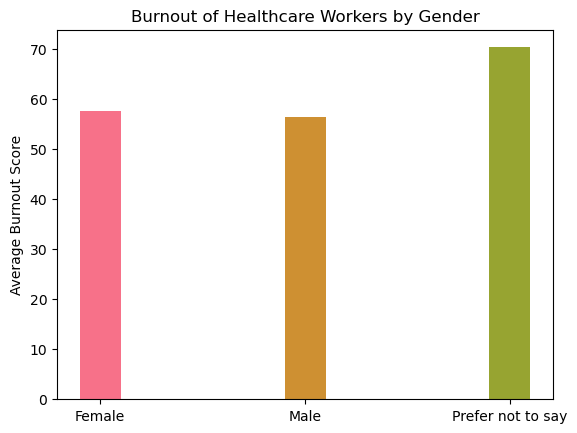

In [6]:
health_care_analysis_burnout_sex_df = burnout_df.copy()
health_care_analysis_burnout_by_gender_df = health_care_analysis_burnout_sex_df.groupby('Gender').mean(numeric_only=True)
this_dict = health_care_analysis_burnout_by_gender_df['Overall Average'].to_dict()
colors = sns.color_palette("husl", 8)
fig, ax = plt.subplots()
plt.bar(this_dict.keys(),
        height=this_dict.values(),
        color=colors,
        width=0.2,
        # align='edge',

        )


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Burnout Score')
ax.set_title('Burnout of Healthcare Workers by Gender')


plt.show()




From the bar graph, the burnout for both male and female are generally burnt out the same.

## Burnout of Healthcare Workers by Years of Service

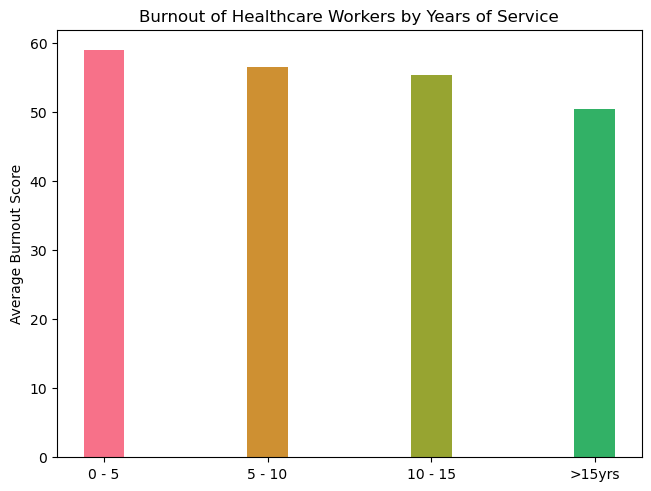

In [7]:
health_care_analysis_burnout_by_years_of_service_df = burnout_df.copy().groupby('Years of service?').mean(numeric_only=True)
this_dict = health_care_analysis_burnout_by_years_of_service_df['Overall Average'].copy().to_dict()
colors = sns.color_palette("husl", 8)
fig, ax = plt.subplots(layout='constrained') #layout='constrained' to prevent overlapping labels
plt.bar(['0 - 5', '5 - 10', '10 - 15', '>15yrs'],
        height=this_dict.values(),
        color=colors,
        width=0.25,
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Burnout Score')
ax.set_title('Burnout of Healthcare Workers by Years of Service')


plt.show()




The analysis shows that there is less burnout among workers who have worked for a longer time.

## Burnout of Healthcare Workers by Comoborbidities

/var/folders/5c/zj027psx22l2qj3zj7dd6b9c0000gn/T/ipykernel_85801/2554848108.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


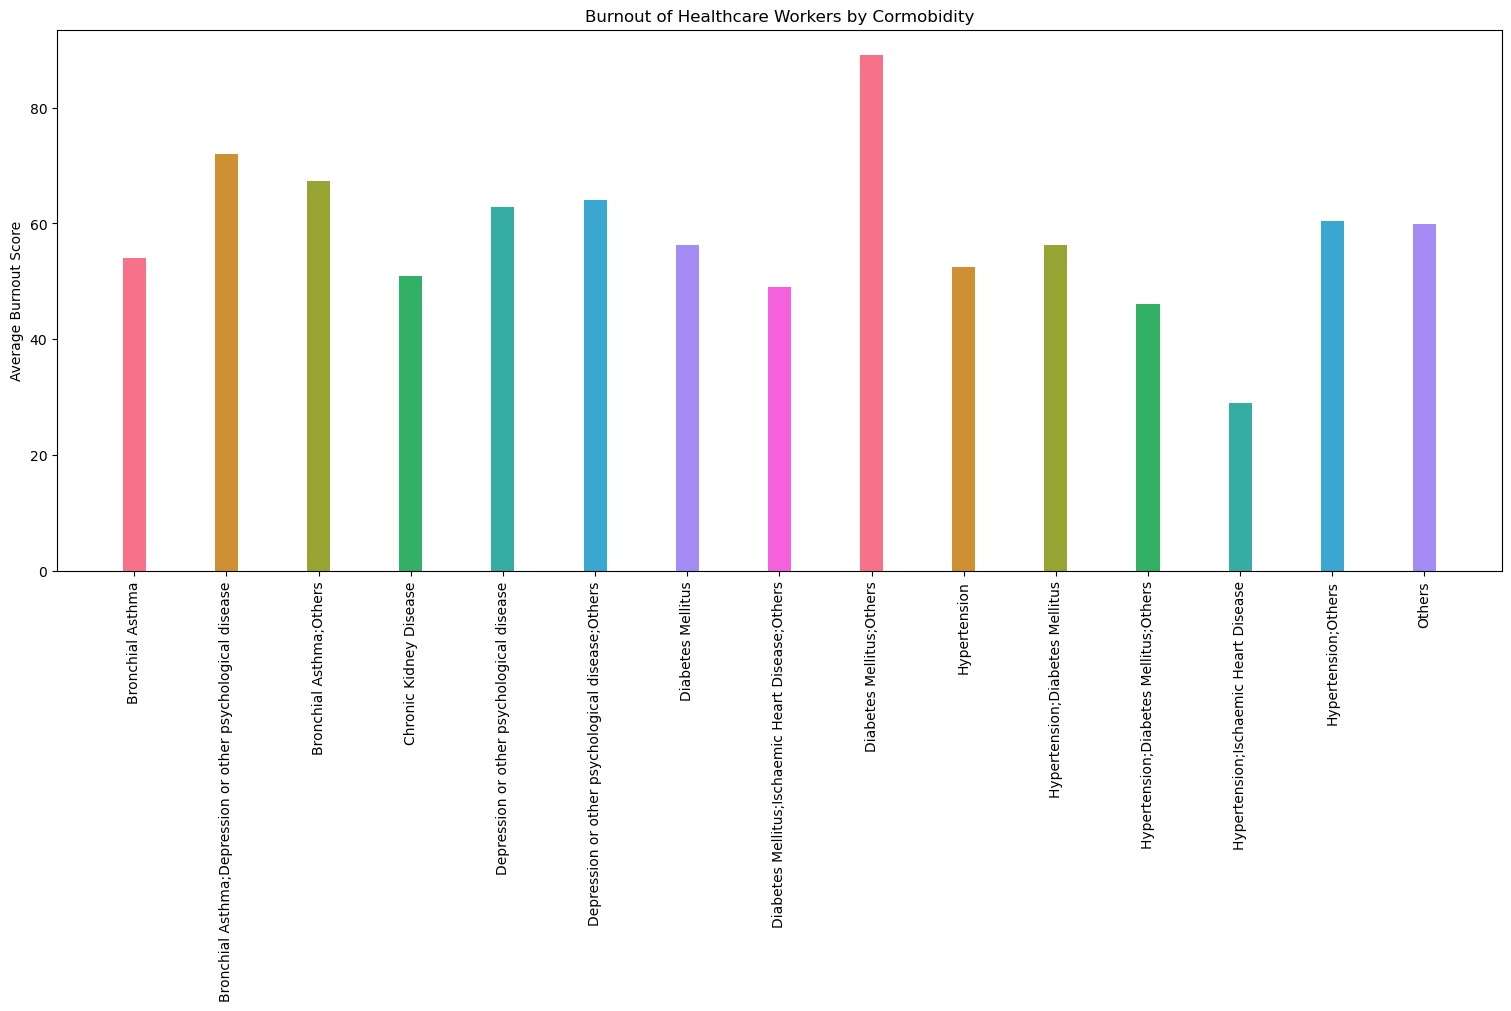

In [8]:
health_care_analysis_burnout_by_comorbidity_df = burnout_df.copy().groupby('Comorbidities?').mean(numeric_only=True)
this_dict = health_care_analysis_burnout_by_comorbidity_df['Overall Average'].to_dict()
colors = sns.color_palette("husl", 8)
fig, ax = plt.subplots(layout='constrained',figsize=(15, 10)) #layout='constrained' to prevent overlapping labels
plt.bar(this_dict.keys(),
        height=this_dict.values(),
        color=colors,
        width=0.25,
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Burnout Score')
ax.set_title('Burnout of Healthcare Workers by Cormobidity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.show()


## Visualizing the level of Burnout by the 3 Domains

In [9]:

final_df = burnout_df.copy().groupby('Designation')[['Domain 1', 'Domain 2', 'Domain 3']].mean(numeric_only=True)
final_df.rename(columns={'Domain 1':'Personal', 'Domain 2':'Work Related', 'Domain 3': 'Client Related' }, inplace=True)

<Axes: xlabel='Designation'>

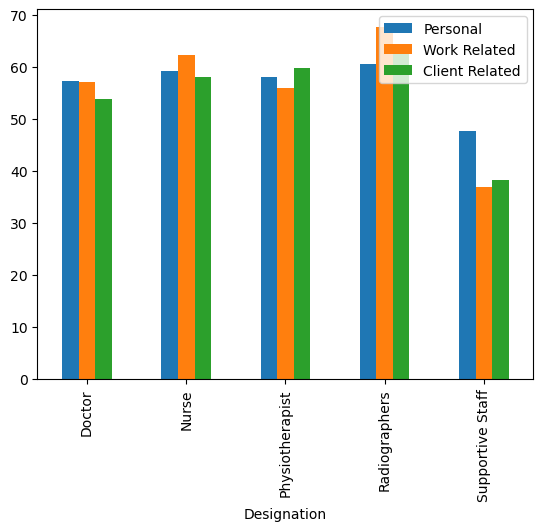

In [10]:
final_df.plot(kind='bar')

This graph show that all three factors generally lead to burnout among the healthcare workers. However, the level of burnout among Radiographers is mainly work-related.

In [11]:
final_df

,Personal,Work Related,Client Related
Designation,,,
Doctor,57.258242,56.961538,53.802198
Nurse,59.142480,62.279683,58.015831
Physiotherapist,58.088235,55.911765,59.647059
Radiographers,60.434783,67.652174,63.956522
Supportive Staff,47.692308,36.884615,38.307692
